# Import Modules

In [57]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from ast import literal_eval

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# EDA



In [58]:
#Read the main data file and save it as a data frame
df = pd.read_csv("C:/Users/viraj/music_recommendation/data.csv")

#Check the shape of the dataframe 
df.shape

(174389, 19)

In [59]:
#Examine the first few rows of data
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

In [62]:
#Check for null/missing values:
df.isna().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

In [63]:
#Check for duplicates in the dataset
df.duplicated().sum()

2159

In [64]:
#There are 2159 exact duplicates in the dataset (same values for all columns). Let's remove them:
df.drop_duplicates()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174379,0.795000,['Alessia Cara'],0.429,144720,0.211,0,45XnLMuqf3vRfskEAMUeCH,0.000000,4,0.1960,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.2280,2021
174381,0.795000,['Alessia Cara'],0.429,144720,0.211,0,4pPFI9jsguIh3wC7Otoyy8,0.000000,4,0.1960,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.2280,2021
174383,0.795000,['Alessia Cara'],0.429,144720,0.211,0,52YtxLVUyvtiGPxwwxayHZ,0.000000,4,0.1960,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.2280,2021
174385,0.795000,['Alessia Cara'],0.429,144720,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.000000,4,0.1960,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.2280,2021


In [65]:
# Though exact duplicates are now gone, we see there are still multiple entries for the same
#  song by the same artist
df.drop_duplicates(subset=['artists', 'duration_ms', 'name'], keep='last')

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174384,0.009170,"['DJ Combo', 'Sander-7', 'Tony T']",0.792,147615,0.866,0,46LhBf6TvYjZU2SMvGZAbn,0.000060,6,0.1780,-5.089,0,The One,0,2020-12-25,0.0356,125.972,0.1860,2020
174385,0.795000,['Alessia Cara'],0.429,144720,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.000000,4,0.1960,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.2280,2021
174386,0.806000,['Roger Fly'],0.671,218147,0.589,0,48Qj61hOdYmUCFJbpQ29Ob,0.920000,4,0.1130,-12.393,0,Together,0,2020-12-09,0.0282,108.058,0.7140,2020
174387,0.920000,['Taylor Swift'],0.462,244000,0.240,1,1gcyHQpBQ1lfXGdhZmWrHP,0.000000,0,0.1130,-12.077,1,champagne problems,69,2021-01-07,0.0377,171.319,0.3200,2021


In [66]:
#Display some sample statistics and look for outliers 
desc_df = df.describe()
desc_df

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,174389.000000,174389.000000,1.743890e+05,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000
mean,0.499228,0.536758,2.328100e+05,0.482721,0.068135,0.197252,5.205305,0.211123,-11.750865,0.702384,25.693381,0.105729,117.006500,0.524533,1977.061764
std,0.379936,0.176025,1.483958e+05,0.272685,0.251978,0.334574,3.518292,0.180493,5.691591,0.457211,21.872740,0.182260,30.254178,0.264477,26.907950
min,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000
25%,0.087700,0.414000,1.661330e+05,0.249000,0.000000,0.000000,2.000000,0.099200,-14.908000,0.000000,1.000000,0.035200,93.931000,0.311000,1955.000000
50%,0.517000,0.548000,2.057870e+05,0.465000,0.000000,0.000524,5.000000,0.138000,-10.836000,1.000000,25.000000,0.045500,115.816000,0.536000,1977.000000
75%,0.895000,0.669000,2.657200e+05,0.711000,0.000000,0.252000,8.000000,0.270000,-7.499000,1.000000,42.000000,0.076300,135.011000,0.743000,1999.000000
max,0.996000,0.988000,5.338302e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.971000,243.507000,1.000000,2021.000000


In [67]:
#Reformatting the "Artists" column to display the artists without any special characters 
df['artists'] = df['artists'].map(lambda x: literal_eval(x))
df['artists'] = df['artists'].map(lambda x: x[0])

In [68]:
df

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,Mamie Smith,0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,Screamin' Jay Hawkins,0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,Mamie Smith,0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,Oscar Velazquez,0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,Mixe,0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174384,0.009170,DJ Combo,0.792,147615,0.866,0,46LhBf6TvYjZU2SMvGZAbn,0.000060,6,0.1780,-5.089,0,The One,0,2020-12-25,0.0356,125.972,0.1860,2020
174385,0.795000,Alessia Cara,0.429,144720,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.000000,4,0.1960,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.2280,2021
174386,0.806000,Roger Fly,0.671,218147,0.589,0,48Qj61hOdYmUCFJbpQ29Ob,0.920000,4,0.1130,-12.393,0,Together,0,2020-12-09,0.0282,108.058,0.7140,2020
174387,0.920000,Taylor Swift,0.462,244000,0.240,1,1gcyHQpBQ1lfXGdhZmWrHP,0.000000,0,0.1130,-12.077,1,champagne problems,69,2021-01-07,0.0377,171.319,0.3200,2021


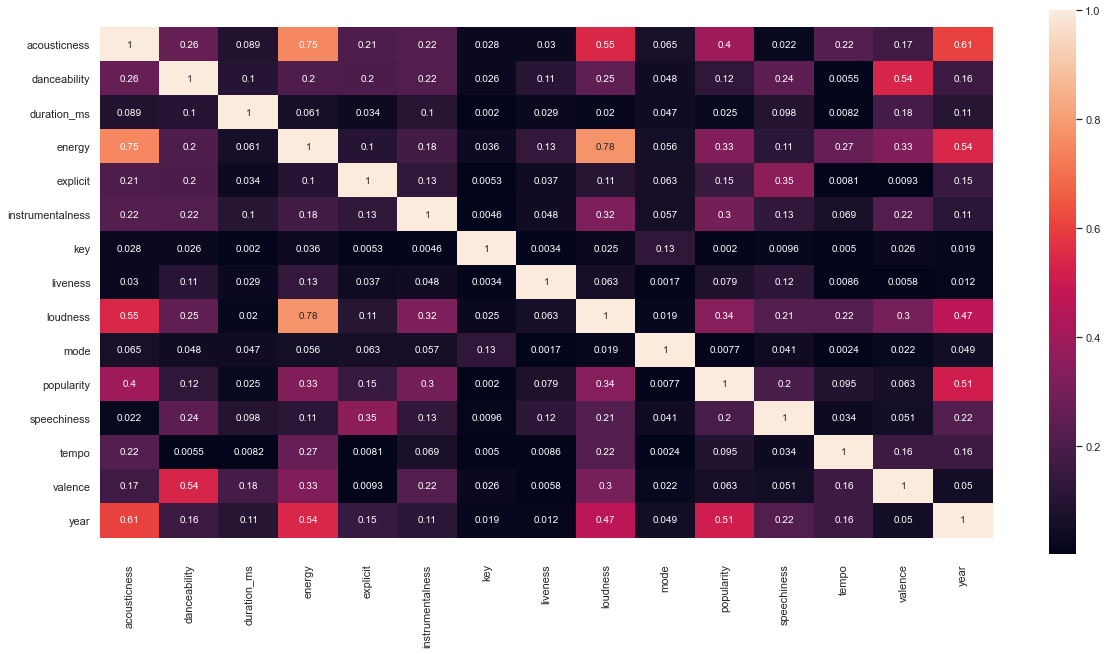

In [69]:
#Explore the correlation between different features 
corr = df.corr().abs()
plt.figure(figsize=(20,10))
ax = sns.heatmap(corr, annot=True) 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

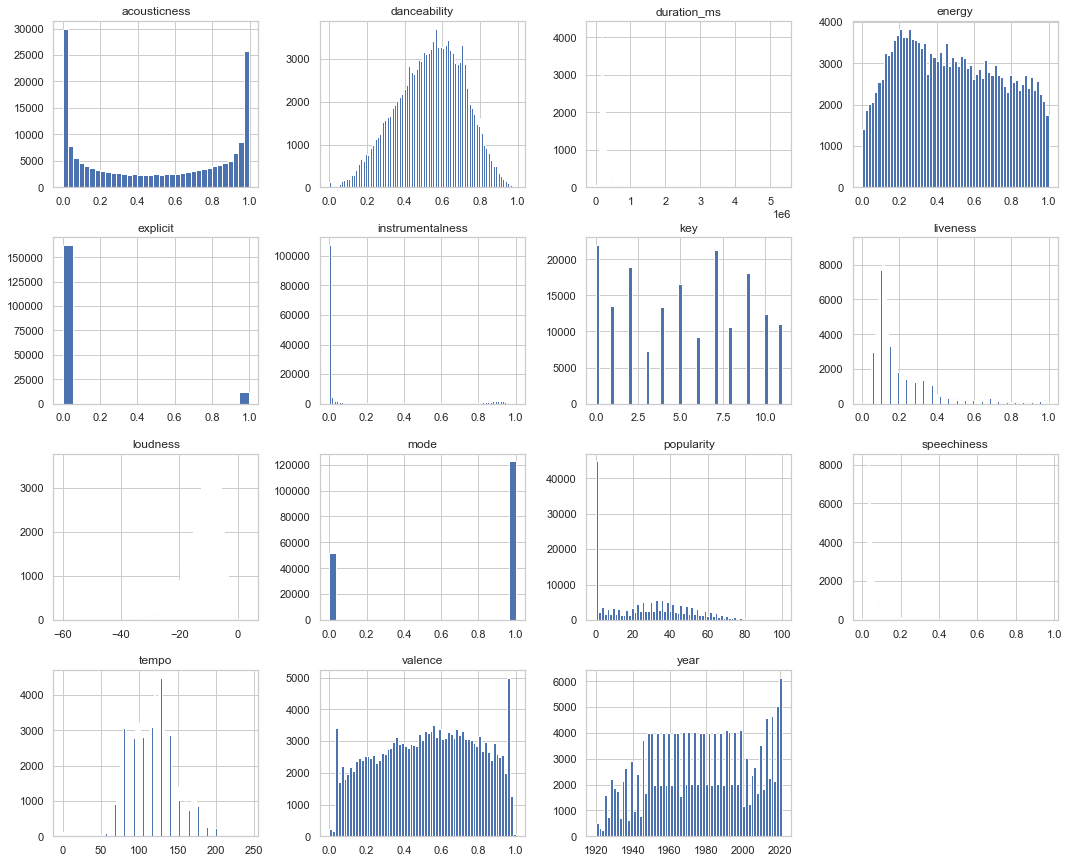

In [70]:
#Let's explore the distribution of each feature by plotting a histogram for each:
df.hist(figsize=(18,15), bins='auto');

In [71]:
#Exploring how many songs there are from each year
print(df.year.nunique())
df.year.value_counts()

102


2020    4294
2018    2714
2013    2622
2016    2349
2019    2329
        ... 
1925     279
1924     236
1923     185
1921     156
1922     121
Name: year, Length: 102, dtype: int64

(array([1900., 1920., 1940., 1960., 1980., 2000., 2020., 2040.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

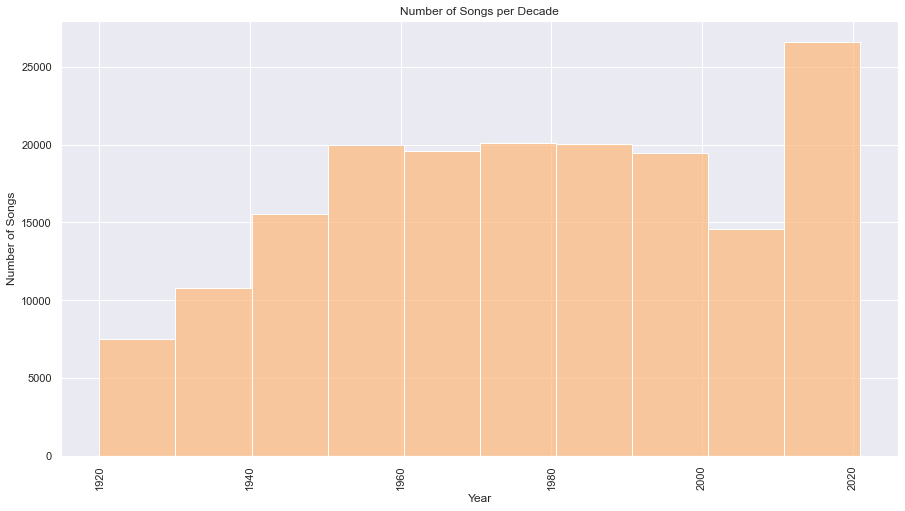

In [72]:
#Using a histogram to explore the song distribution by decades
sns.set(rc={'figure.figsize':(15,8)}, palette='magma_r')
axis = sns.histplot(df.year, bins=10)
axis.set_title('Number of Songs per Decade')
axis.set_ylabel('Number of Songs')
axis.set_xlabel('Year')
plt.xticks(rotation = 90)

In [73]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

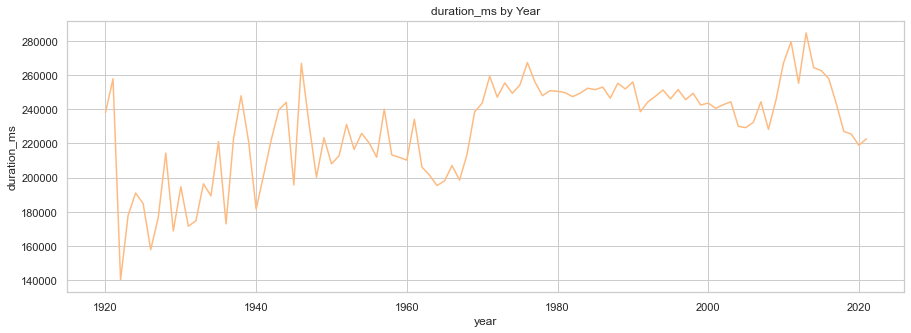

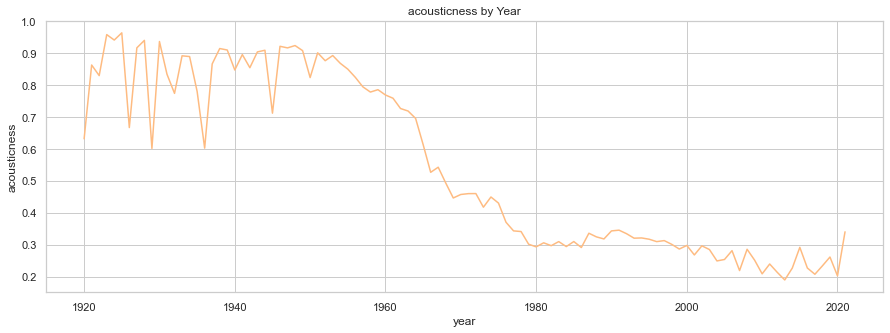

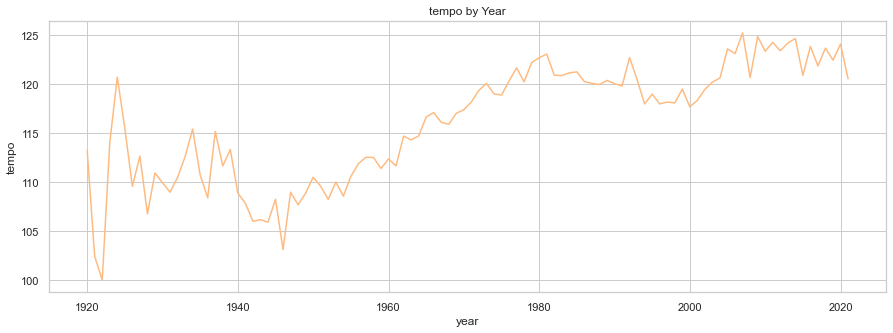

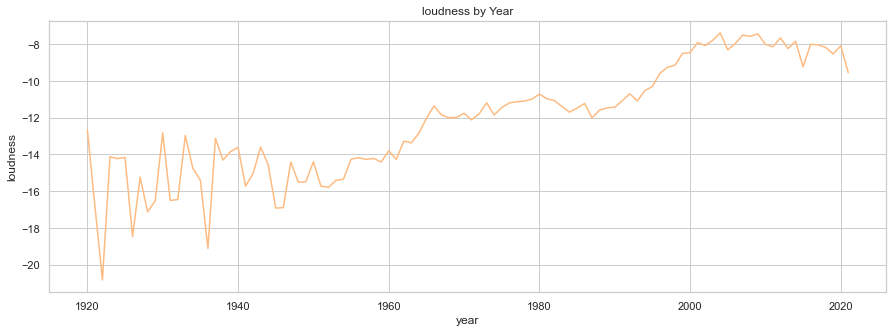

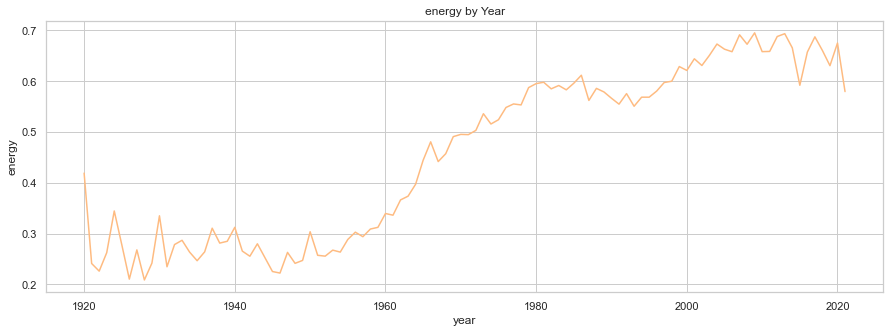

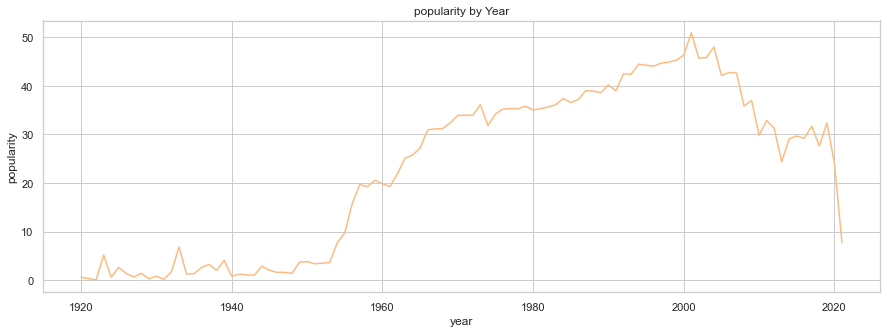

In [74]:
#Create a visualization for each of the following categories and its development through the years
categories = ['duration_ms', 'acousticness', 'tempo', 'loudness', 'energy', 'popularity']

for col in categories:
    y = df.groupby('year')[col].mean()
    x = y.index
    plt.figure(figsize=(15, 5))
    sns.set_style("whitegrid")
    plt.title(f"{col} by Year")
    sns.lineplot(x, y)

In [75]:
# #Let's see how cursing has changed over the years
# explicit = df.groupby('year')['explicit'].mean()
# explicit = explicit.reset_index()
# explicit.columns = ['year', 'mean']
# explicit.plot.bar(x='year', y='mean', figsize=(20,10))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'drivers license'),
  Text(1, 0, 'positions'),
  Text(2, 0, 'Mood (feat. iann dior)'),
  Text(3, 0, 'Whoopty'),
  Text(4, 0, '34+35'),
  Text(5, 0, 'WITHOUT YOU'),
  Text(6, 0, 'LA NOCHE DE ANOCHE'),
  Text(7, 0, 'Therefore I Am'),
  Text(8, 0, 'DÁKITI'),
  Text(9, 0, 'What You Know Bout Love'),
  Text(10, 0, 'you broke me first'),
  Text(11, 0, 'Anyone'),
  Text(12, 0, 'The Business'),
  Text(13, 0, 'HOLIDAY'),
  Text(14, 0, 'WAP (feat. Megan Thee Stallion)'),
  Text(15, 0, 'Lonely (with benny blanco)'),
  Text(16, 0, "Hecha Pa' Mi"),
  Text(17, 0, 'ROCKSTAR (feat. Roddy Ricch)'),
  Text(18, 0, 'Head & Heart (feat. MNEK)'),
  Text(19, 0, 'For The Night (feat. Lil Baby & DaBaby)')])

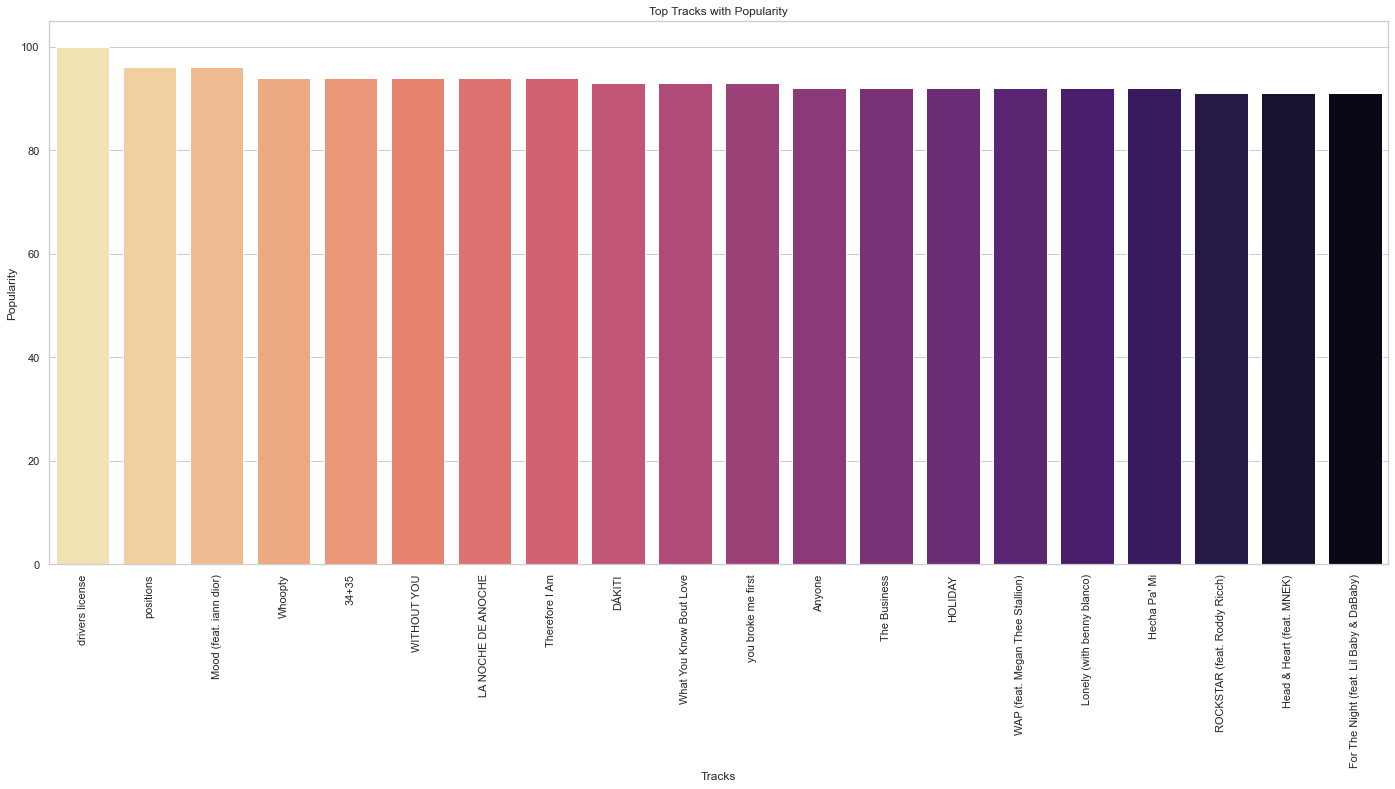

In [76]:
plt.figure(figsize=(24, 10))
sns.set(style="whitegrid")
x = df.groupby("name")["popularity"].mean().sort_values(ascending=False).head(20)
axis = sns.barplot(x.index, x, palette='magma_r')
axis.set_title('Top Tracks with Popularity')
axis.set_ylabel('Popularity')
axis.set_xlabel('Tracks')
plt.xticks(rotation = 90)

In [77]:
print('25 Most Popular Songs on Spotify!')
df[['name','artists','release_date','popularity']].sort_values(by='popularity',ascending=False).head(25)

25 Most Popular Songs on Spotify!


,name,artists,release_date,popularity
20062,drivers license,Olivia Rodrigo,2021-01-08,100
19862,Mood (feat. iann dior),24kGoldn,2020-07-24,96
19866,positions,Ariana Grande,2020-10-30,96
19886,DÁKITI,Bad Bunny,2020-10-30,95
19976,BICHOTA,KAROL G,2020-10-23,95
19868,34+35,Ariana Grande,2020-10-30,94
19870,Whoopty,CJ,2020-08-20,94
19872,WITHOUT YOU,The Kid LAROI,2020-11-06,94
19876,Therefore I Am,Billie Eilish,2020-11-12,94
19928,LA NOCHE DE ANOCHE,Bad Bunny,2020-11-27,94


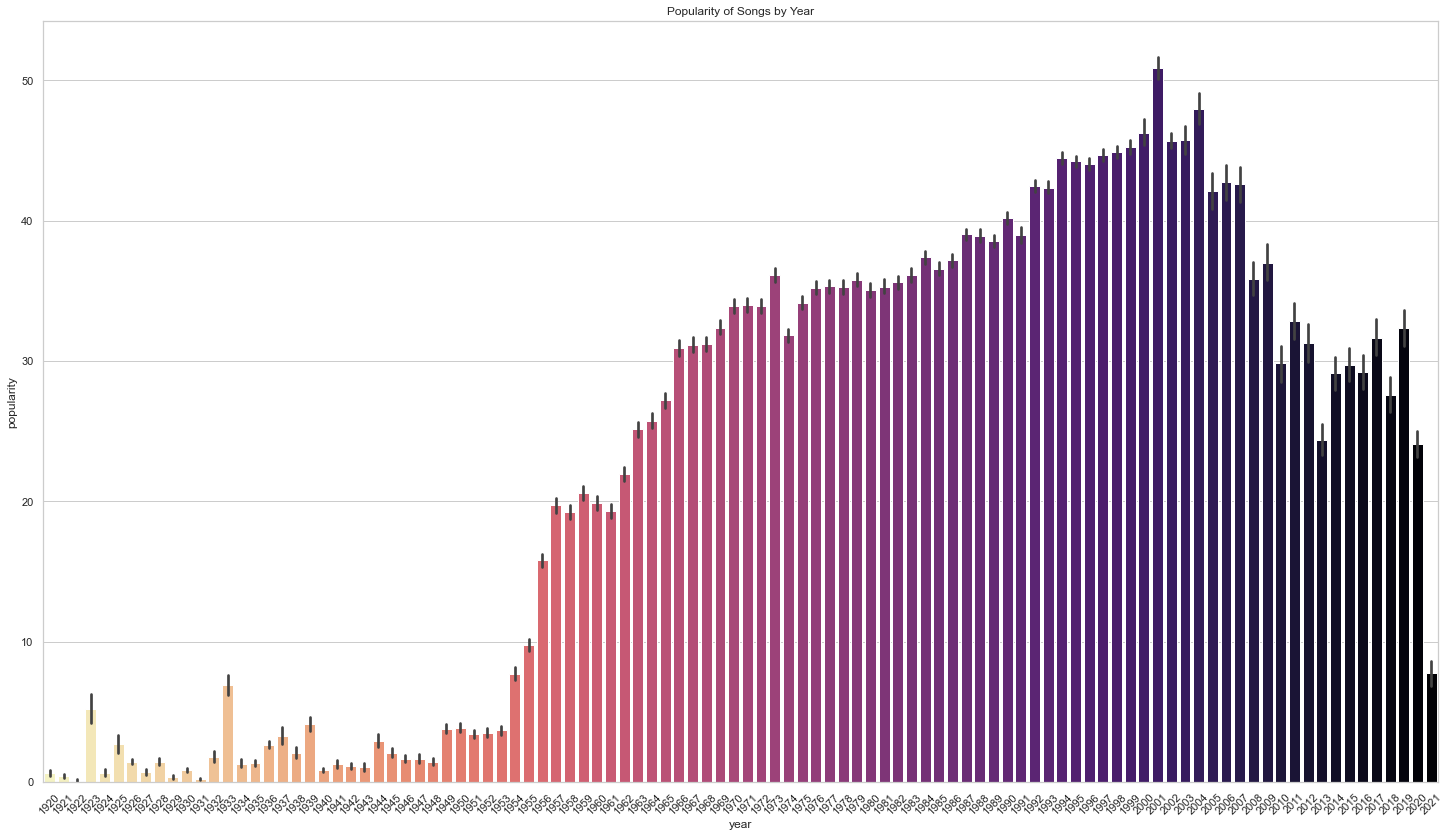

In [78]:
#Taking a closer look at what the line graph above showed us about popularity
plt.figure(figsize=(25,14))
plt.xlabel('year')
plt.ylabel('popularity')
plt.xticks(rotation=45)
plt.title('Popularity of Songs by Year')
plt.gca().margins(x=0)
plt.gcf().canvas.draw()
sns.barplot(x='year',y='popularity',data=df.sort_values(by='year',ascending=False), palette='magma_r')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Frank Sinatra'),
  Text(1, 0, 'The Beatles'),
  Text(2, 0, 'Elvis Presley'),
  Text(3, 0, 'The Rolling Stones'),
  Text(4, 0, 'Fleetwood Mac'),
  Text(5, 0, 'Bob Dylan'),
  Text(6, 0, 'Taylor Swift'),
  Text(7, 0, 'Johnny Cash'),
  Text(8, 0, 'Ella Fitzgerald'),
  Text(9, 0, 'Led Zeppelin'),
  Text(10, 0, 'Queen'),
  Text(11, 0, 'Johann Sebastian Bach'),
  Text(12, 0, 'The Beach Boys'),
  Text(13, 0, 'Bob Marley & The Wailers'),
  Text(14, 0, 'David Bowie'),
  Text(15, 0, 'Pink Floyd'),
  Text(16, 0, 'Eminem'),
  Text(17, 0, 'Billie Holiday'),
  Text(18, 0, 'Miles Davis'),
  Text(19, 0, 'Vicente Fernández')])

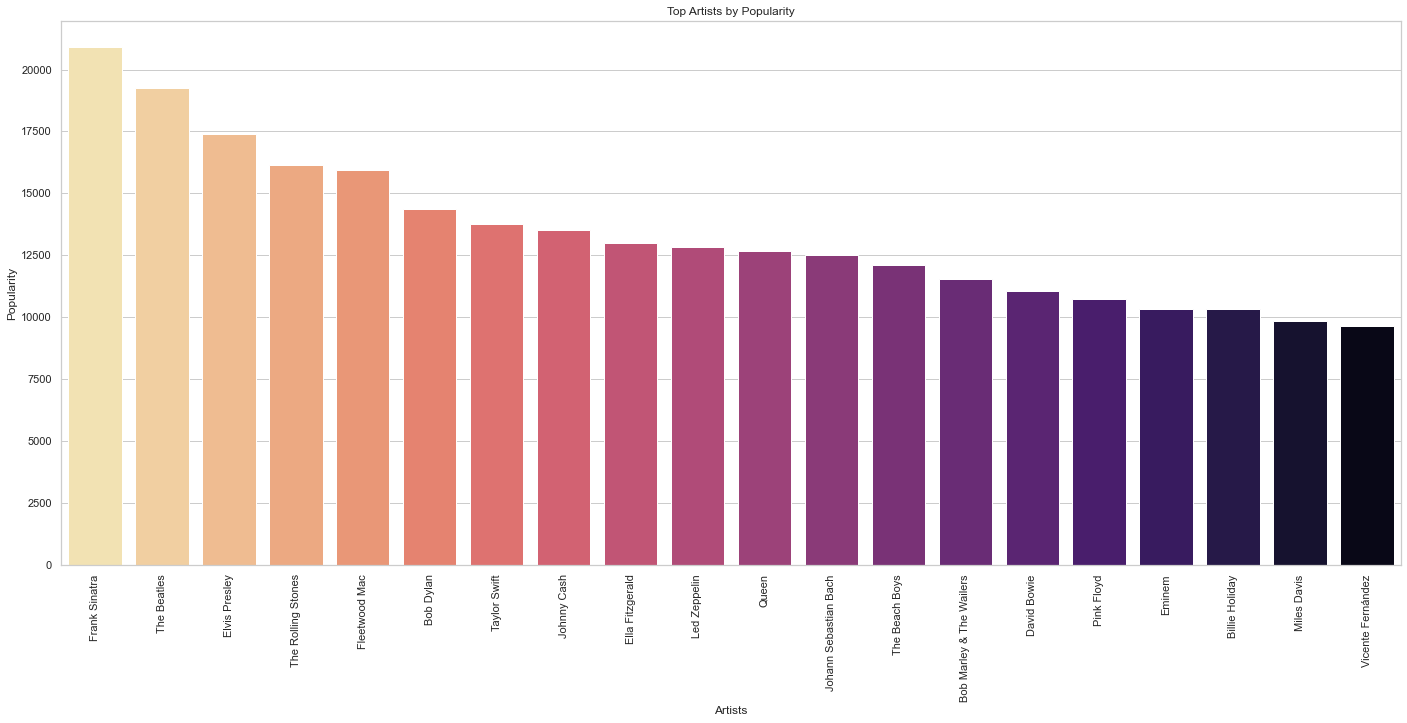

In [79]:
plt.figure(figsize=(24, 10))
sns.set(style="whitegrid")
x = df.groupby("artists")["popularity"].sum().sort_values(ascending=False).head(20)
ax = sns.barplot(x.index, x, palette='magma_r')
ax.set_title('Top Artists by Popularity')
ax.set_ylabel('Popularity')
ax.set_xlabel('Artists')
plt.xticks(rotation = 90)

In [80]:
# Slicing the data by savings all songs released after 1980 as a new DataFrame 
songs = df[df['year'] > 1980]
print(songs.shape)
songs.head()

(80733, 19)


,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
9071,0.394,Gerry & The Pacemakers,0.484,160187,0.265,0,6catF1lDhNTjjGa2GxRQNN,0.000000,0,0.149,-11.101,1,You'll Never Walk Alone - Mono; 2002 Remaster,55,2008-02-11,0.0322,113.564,0.285,2008
9081,0.255,Gerry & The Pacemakers,0.405,141987,0.365,0,4aSw1QJIMwYSoDEgzgdCJL,0.000005,6,0.163,-10.226,0,Ferry Cross the Mersey - Mono; 2002 Remaster,39,2008-02-11,0.0289,104.536,0.588,2008
9085,0.406,Gerry & The Pacemakers,0.477,157093,0.352,0,0ZMMtH875IR2TfkyC4PolD,0.000000,1,0.122,-14.165,1,Don't Let the Sun Catch You Crying (Main) - Mono,34,2008-02-11,0.0300,106.773,0.478,2008
9087,0.887,Frank Sinatra,0.319,187333,0.201,0,1hx7X9cMXHWJjknb9O6Ava,0.000000,7,0.904,-17.796,1,The September Of My Years - Live At The Sands ...,27,2018-05-04,0.0623,117.153,0.239,2018
9091,0.938,Frank Sinatra,0.269,236800,0.129,0,19oquvXf3bc65GSqtPYA5S,0.000005,7,0.683,-18.168,0,It Was A Very Good Year - Live At The Sands Ho...,26,2018-05-04,0.0576,82.332,0.160,2018


In [81]:
#Resetting the index for the new DataFrame
songs.reset_index(drop=True, inplace=True)

In [82]:
#Dropping columns that We won't need 
songs = songs.drop(columns=['id', 'release_date'])

In [83]:
sound_params = songs[['acousticness', 'danceability', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence']]

metadata = songs.drop(['acousticness', 'danceability','energy', 'instrumentalness', 'key', 
                       'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence'], axis = 1)

In [84]:
sound_params.head(10)

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,0.394,0.484,0.265,0.000000,0,0.1490,-11.101,1,0.0322,113.564,0.285
1,0.255,0.405,0.365,0.000005,6,0.1630,-10.226,0,0.0289,104.536,0.588
2,0.406,0.477,0.352,0.000000,1,0.1220,-14.165,1,0.0300,106.773,0.478
3,0.887,0.319,0.201,0.000000,7,0.9040,-17.796,1,0.0623,117.153,0.239
4,0.938,0.269,0.129,0.000005,7,0.6830,-18.168,0,0.0576,82.332,0.160
5,0.360,0.617,0.711,0.000002,9,0.0841,-6.433,1,0.0297,142.266,0.963
6,0.881,0.644,0.212,0.000022,11,0.7980,-14.118,1,0.0347,117.072,0.441
7,0.955,0.627,0.184,0.000162,1,0.0986,-15.533,1,0.0450,115.864,0.299
8,0.888,0.581,0.331,0.000015,6,0.1470,-14.087,1,0.2430,88.303,0.642
9,0.930,0.442,0.399,0.000499,6,0.9120,-12.661,1,0.0780,121.662,0.554


In [85]:
#Scale the sound-specific features and organize them in a new DataFrame
scaler = MinMaxScaler()
sound_features = pd.DataFrame()
for col in sound_params.columns:    
    sound_features[col] = scaler.fit_transform(sound_params[col].values.reshape(-1,1)).ravel() 
    

In [86]:
sound_features.head(3)

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,0.395582,0.489879,0.265,0.000000,0.000000,0.149,0.771679,1.0,0.033472,0.505995,0.285
1,0.256024,0.409919,0.365,0.000005,0.545455,0.163,0.785488,0.0,0.030042,0.465770,0.588
2,0.407631,0.482794,0.352,0.000000,0.090909,0.122,0.723326,1.0,0.031185,0.475737,0.478


In [87]:
#Combine the songs metadata with the sound features in a new DataFrame
mdf = metadata.join(sound_features)

In [88]:
mdf.tail(3)

,artists,duration_ms,explicit,name,popularity,year,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
80730,Roger Fly,218147,0,Together,0,2020,0.809237,0.679150,0.589,0.920,0.363636,0.113,0.751290,0.0,0.029314,0.481463,0.714
80731,Taylor Swift,244000,1,champagne problems,69,2021,0.923695,0.467611,0.240,0.000,0.000000,0.113,0.756277,1.0,0.039189,0.763328,0.320
80732,Roger Fly,197710,0,Improvisations,0,2020,0.239960,0.685223,0.460,0.891,0.636364,0.215,0.753752,1.0,0.026819,0.499953,0.747


# BY SONG 

In [89]:
def recomend_songs_by_sound_similarity(data, song, artist):
    
    try: 
        song_and_artist_data = data[(data['name'] == song) & (data["artists"]== artist)]

        similar_songs = data.copy()

        sound_properties = similar_songs.loc[:,['acousticness', 'danceability',
           'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
           'speechiness', 'tempo', 'valence']]

        #Calculate similiary of all songs to the one we want
        similar_songs['Similarity with song'] = cosine_similarity(sound_properties, 
        sound_properties.to_numpy()[song_and_artist_data.index[0],None]).squeeze()

        similar_songs.rename(columns={'name': f'Songs Similar to {song}'}, inplace=True)

        similar_songs = similar_songs.sort_values(by= 'Similarity with song', ascending = False)

        similar_songs = similar_songs[['artists', f'Songs Similar to {song}',
          'year','popularity']]

        similar_songs.reset_index(drop=True, inplace=True)

        return similar_songs.iloc[1:11]
    
    except:
        print("Oops! This song is not included in our dataset")

In [90]:
recomend_songs_by_sound_similarity(mdf, "Shallow", "Lady Gaga")

,artists,Songs Similar to Shallow,year,popularity
1,*NSYNC,You Don't Have To Be Alone (On Christmas) - Fr...,2000,33
2,Van Morrison,These Are the Days,1989,55
3,Air Supply,Lonely Is the Night,1986,58
4,John Mayer,The Age of Worry,2012,54
5,Ronnie Milsap,Houston Solution,1989,32
6,*NSYNC,The Christmas Song (Chestnuts Roasting on an O...,1998,45
7,Lady Gaga,Shallow - Radio Edit,2018,78
8,JJ Lin,Our Singapore,2015,19
9,Ryan Cabrera,True,2004,64
10,Graham BLVD,Picture,2020,0


In [91]:
nn_mdf = mdf.drop(columns=['artists', 'name'])

In [92]:
songs_nn = NearestNeighbors(n_neighbors=11, algorithm='ball_tree').fit(nn_mdf)

In [93]:
distances, indices = songs_nn.kneighbors(nn_mdf)

In [94]:
def recommend_songs(song=None,id=None):
    if id:
        for id in indices[id][1:]:
            print(mdf.iloc[id]["name"])
    if song:
        recommendations = []
        found_id = get_index_from_name(song)
        for id in indices[found_id][1:]:
            recommendations.append((mdf.iloc[id]["name"], mdf.iloc[id]["artists"]))
            print(mdf.iloc[id]["name"], mdf.iloc[id]["artists"])
        return recommendations

In [95]:
results3 = recommend_songs("The Rain (Supa Dupa Fly)")

Mañana Gloria Trevi
Le carnaval des animaux, R. 125: Le cygne Camille Saint-Saëns
Con te partirò Andrea Bocelli
Nunca Quedas Mal Con Nadie Los Prisioneros
A Million To One KISS
Back at the Funny Farm Motörhead
Silly Crush Masaki Matsubara
WANTED U Joji
Stayin True Chris Travis
She's Royal Tarrus Riley


In [96]:
songs_nn2 = NearestNeighbors(n_neighbors=11, algorithm='kd_tree', leaf_size = 40, metric = 'euclidean').fit(nn_mdf)
distances2, indices2 = songs_nn2.kneighbors(nn_mdf)

In [97]:
def recommend_songs_2(song=None,id=None):
    if id:
        for id in indices2[id][1:]:
            print(music.iloc[id]["name"])
    if song:
        recommendations = []
        found_id = get_index_from_name(song)
        for id in indices2[found_id][1:]:
            recommendations.append((mdf.iloc[id]["name"], mdf.iloc[id]["artists"]))
            print(mdf.iloc[id]["name"], mdf.iloc[id]["artists"])
        return recommendations

In [98]:
results4 = recommend_songs_2("The Rain (Supa Dupa Fly)")

Mañana Gloria Trevi
Le carnaval des animaux, R. 125: Le cygne Camille Saint-Saëns
Con te partirò Andrea Bocelli
Nunca Quedas Mal Con Nadie Los Prisioneros
A Million To One KISS
Back at the Funny Farm Motörhead
Silly Crush Masaki Matsubara
WANTED U Joji
Stayin True Chris Travis
She's Royal Tarrus Riley
